## 임계값 이용하기

임계값(Threshold)을 이용해서 이미지를 이진화하는 것은 영상처리에서 자주 사용되는 기술입니다. 

### cv2.threshold(src, thresh, maxValue, thresholdType) -> ret, dst

- src : 단일 채널(회색조) 입력 이미지입니다.
- thresh : 임계값입니다.
- maxValue : 임계값을 넘었을 경우 적용할 값입니다. 
- thresholdType : 임계값을 적용할 타입입니다. 

반환값은 임계값과 결과 이미지입니다.

In [1]:
import cv2
flags = [flag for flag in dir(cv2) if flag.startswith("THRESH_")]
print(flags[:10]) # 너무 많아서 다 출력하면 보기 불편함

['THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_MASK', 'THRESH_OTSU', 'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRIANGLE', 'THRESH_TRUNC']


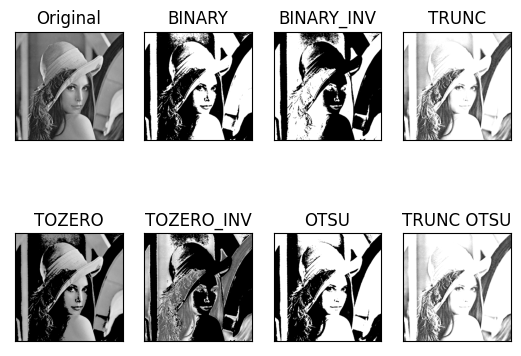

In [3]:
# 임계 타입에 따른 결과 비교
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./data/lena.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)
ret, thresh6 = cv2.threshold(img,-1,255, cv2.THRESH_OTSU)
ret, thresh7 = cv2.threshold(img,-1,255, cv2.THRESH_TRUNC | cv2.THRESH_OTSU)

titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','OTSU','TRUNC OTSU']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7]

for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [4]:
# 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=', ret)
cv2.imshow('dst',  dst)

ret2, dst2 = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()

ret= 120.0
ret2= 175.0


## 적응 임계처리

임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검은색으로 보이게 됩니다. 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 나눠서 하는 임계처리를 적응 임계처리라고 합니다. 이때 사용하는 함수가 cv2.adaptiveThreshold() 입니다. 

### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C) -> dst

- src : 단일 채널(회색조) 입력 이미지입니다.
- maxValue : 임계값을 넘었을 경우 적용할 값입니다.
- adaptiveMethod : 임계값을 결정하는 계산 방법을 지정합니다(아래 참고). 
- thresholdType : 임계값을 적용할 타입입니다. 
- blockSize : 임계치를 적용할 영역의 크기(가로세로화소)입니다.
- C : 평균이나 가중평균에서 차감할 값입니다.

In [7]:
import cv2
flags = [flag for flag in dir(cv2) if flag.startswith("ADAPTIVE_THRESH_")]
print(flags[:10]) # 너무 많아서 다 출력하면 보기 불편함

['ADAPTIVE_THRESH_GAUSSIAN_C', 'ADAPTIVE_THRESH_MEAN_C']


In [1]:
# 적응형 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('dst',  dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',  dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()

# 히스토그램

## 이미지 히스토그램

이미지 히스토그램은 가로축에 화소의 값을, 세로축에 화소의 수를 이용해 막대그래프로 표현한 것입니다. 화소 값의 범위는 0-255이지만 실제 화소들이 분포된 범위는 다를 수 있습니다. 히스토그램을 이용하면 화소들이 어떤 값에 더 많이 분포되어 있는지 알 수 있습니다. 히스토그램 분포를 직접 계산하는 방법 또는 cv2.calcHist() 함수를 이용해 분포를 구하는 방법을 사용할 수 있습니다.

### cv2.calcHist(image, channels, mask, histSize, ranges) -> histo

- image : 분석 대상 이미지입니다.
- channels : 분석 채널(x축)입니다. 이미지가 회색조면 [0], 컬러면 [0], [1], [2] (b, g, r) 형태입니다.
- mask : 이미지의 분석 영역입니다. None이면 전체 영역을 의미합니다.
- histSize : 히스토그램 구간 수(BINS)입니다. 색상 히스토그램을 위해 [256]을 지정합니다.
- ranges : 히스토그램을 그릴 범위입니다. [0, 256]을 지정합니다. 

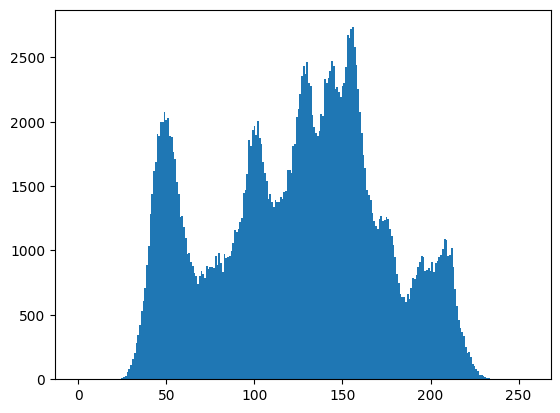

In [24]:
# 히스토그램 직접 계산 후 막대그래프 그리기
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./data/lena.jpg", flags=cv2.IMREAD_GRAYSCALE)
hist = np.zeros((256))
width, height = img.shape

for y in range(height):
    for x in range(width):
        hist[img[y,x]] = hist[img[y,x]] + 1

        
plt.bar(x=range(256), height=hist, width=1)
plt.show()

In [25]:
# 히스토그램 계산
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist1 = ', hist1)

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print('hist2 = ', hist2)

hist1 =  [[9.]
 [3.]
 [2.]
 [2.]]
hist2 =  [[4.]
 [5.]
 [0.]
 [3.]]


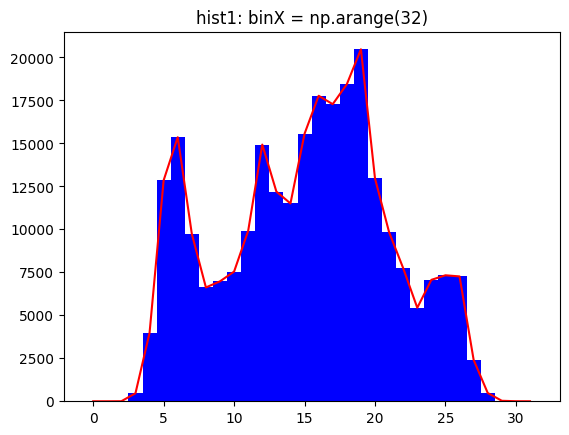

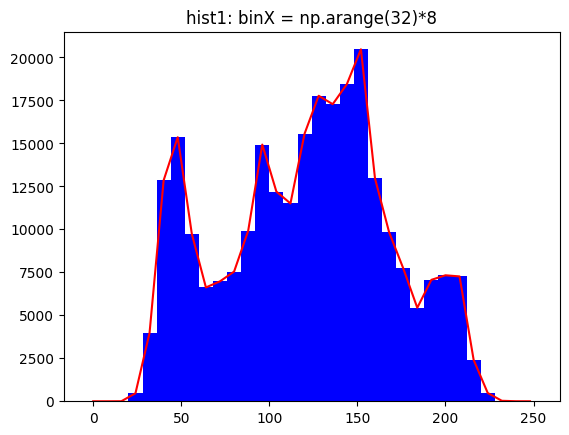

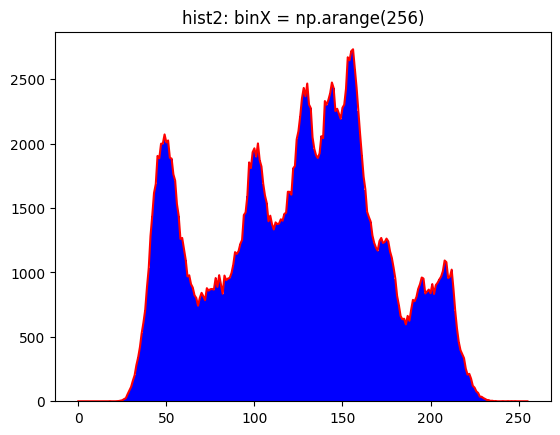

In [26]:
# 히스토그램 계산 with 회색조 영상
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[32], ranges=[0, 256])

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
#1
hist1 = hist1.flatten()
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arange(32)')
plt.plot(hist1, color='r')
binX = np.arange(32)

plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arange(32)*8')
binX = np.arange(32)*8
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')
plt.show()

#4
plt.title('hist2: binX = np.arange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()

## 채널

영상처리에서 채널(channels)은 한 개 화소가 가지고 있는 정보를 의미합니다. 그레이스케일 이미지의 경우 채널이 1개이고, RGB 정보를 가지고 있는 컬러 이미지의 경우 채널이 3개입니다. cv2.calcHist() 함수는 채널별로 히스토그램을 계산할 수 있습니다. 컬러 영상의 경우 채널이 0, 1, 2이며, 0이면 Blue, 1이면 Green, 2이면 Red입니다. 

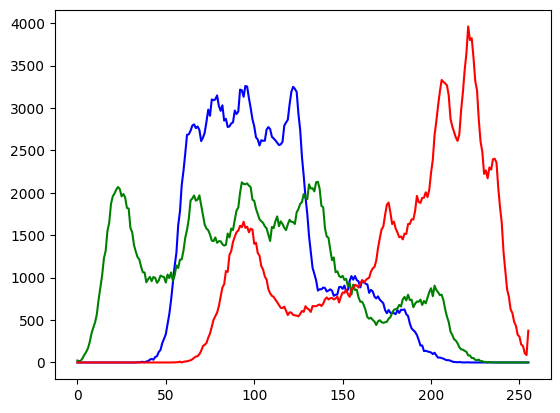

In [29]:
# 히스토그램 with 컬러 영상
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg')
histColor = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                    histSize=[256], ranges=[0, 256])
    plt.plot(hist, color = histColor[i])    
plt.show()

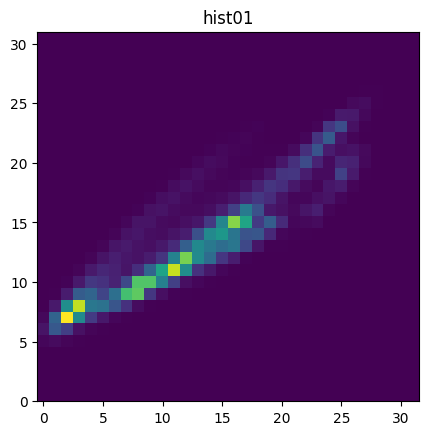

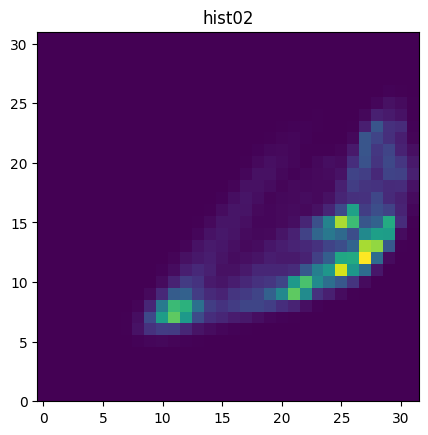

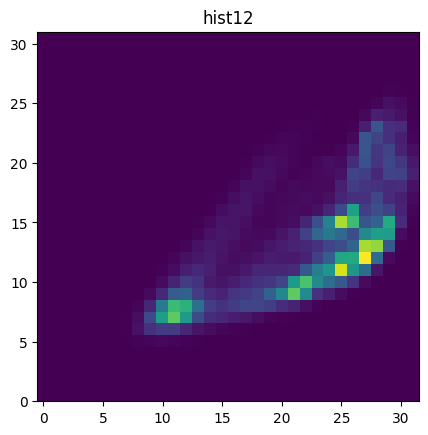

In [30]:
# 컬러 영상의 2채널 히스토그램
import cv2
from   matplotlib import pyplot as plt

bgr = cv2.imread('./data/lena.jpg')
##hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#1
hist01 = cv2.calcHist([bgr], [0,1], None, [32, 32], [0, 256, 0, 256])
##cv2.normalize(hist01, hist01, 0, 1, cv2.NORM_MINMAX)
##fig = plt.figure()
##fig.canvas.set_window_title('2D Histogram')

plt.title('hist01')
plt.ylim(0, 31)
plt.imshow(hist01, interpolation = "nearest")
plt.show()

#2
hist02 = cv2.calcHist([bgr], [0,2], None, [32, 32], [0, 256, 0, 256])
plt.title('hist02')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

#3
hist12 = cv2.calcHist([bgr], [1,2], None, [32, 32], [0, 256, 0, 256])
plt.title('hist12')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

In [31]:
# 히스토그램 역투영
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist = ', hist)

backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)
print('backP = ', backP)

hist =  [[9.]
 [3.]
 [2.]
 [2.]]
backP =  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


In [1]:
# Hue 채널의 히스토그램 역투영
import cv2
import numpy as np

#1
src = cv2.imread('./data/fruits.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

#2
roi = cv2.selectROI(src)
print('roi =', roi)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
hist = cv2.calcHist([roi_h], [0], None,[64], [0, 256])
backP= cv2.calcBackProject([h.astype(np.float32)], [0], hist,[0, 256],scale=1.0)
##minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(backP)
##T = maxVal -1 # threshold

#3
hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING)
k = 1 
T = hist[k][0] -1 # threshold
print('T =', T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

roi = (172, 164, 21, 20)
T = 89.0


d1(H1, H2, CORREL) = 0.576304846279405
d2(H1, H2, CHISQR)= 55.19083853156566
d3(H1, H2, INTERSECT)= 0.49011999076537904
d4(H1, H2, BHATTACHARYYA)= 0.48884233127652543


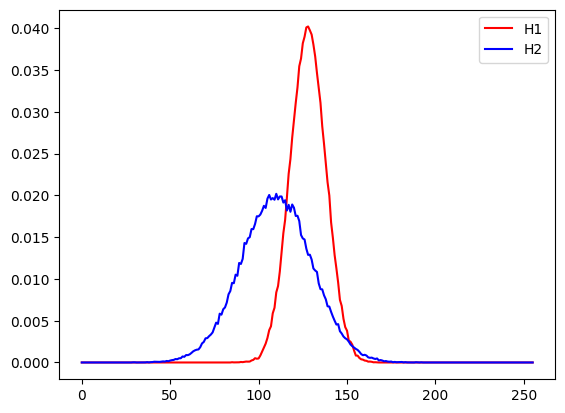

In [2]:
# 1차원 히스토그램 비교
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10))
cv2.randn(pts2, mean=(110), stddev=(20))            

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H1, H1, 1, 0, cv2.NORM_L1)
plt.plot(H1, color='r', label='H1')

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H2, H2, 1, 0, cv2.NORM_L1)

#3
d1 = cv2.compareHist(H1, H2, cv2.HISTCMP_CORREL)
d2 = cv2.compareHist(H1, H2, cv2.HISTCMP_CHISQR)
d3 = cv2.compareHist(H1, H2, cv2.HISTCMP_INTERSECT)
d4 = cv2.compareHist(H1, H2, cv2.HISTCMP_BHATTACHARYYA)
print('d1(H1, H2, CORREL) =',       d1)
print('d2(H1, H2, CHISQR)=',        d2)
print('d3(H1, H2, INTERSECT)=',     d3)
print('d4(H1, H2, BHATTACHARYYA)=', d4)

plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()

EMD(S1, S2, DIST_L1) = 18.305749893188477
EMD(S1, S2, DIST_L2) = 18.305749893188477
EMD(S1, S2, DIST_C) = 18.305749893188477


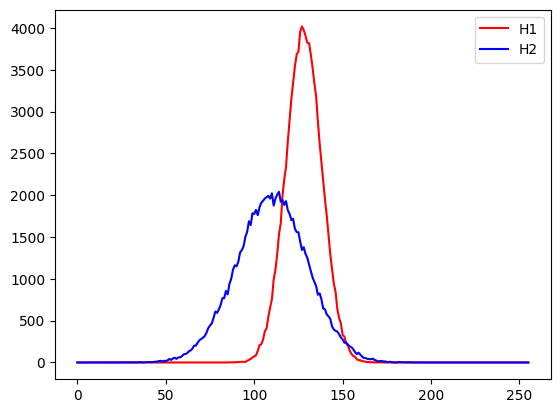

In [3]:
# EMD 히스토그램 비교
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10))
cv2.randn(pts2, mean=(110), stddev=(20))            

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H1, H1, norm_type=cv2.NORM_L1)

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H2, H2, norm_type=cv2.NORM_L1)

#3
S1 = np.zeros((H1.shape[0], 2), dtype=np.float32)
S2 = np.zeros((H1.shape[0], 2), dtype=np.float32)
##S1[:, 0] = H1[:, 0]
##S2[:, 0] = H2[:, 0]
for i in range(S1.shape[0]):
    S1[i, 0] = H1[i,0]
    S2[i, 0] = H2[i,0]
    S1[i, 1] = i
    S2[i, 1] = i

emd1, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L1)
print('EMD(S1, S2, DIST_L1) =',  emd1)

emd2, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L2)
print('EMD(S1, S2, DIST_L2) =',  emd2)

emd3, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_C) 
print('EMD(S1, S2, DIST_C) =',  emd3)

plt.plot(H1, color='r', label='H1')
plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()

## 콘트라스트 강조 

콘트라스트(대비) 강조는 명암의 대비를 극대화시켜 선명한 영상을 만드는 것입니다. 이것은 입력 영상의 임의 구간을 출력 영상의 정해진 다른 구간에 매핑시킵니다. 그래서 정규화(Normalize)라고도 표현합니다. 

### cv2.normalize(src, dst, alpha, beta, flag) -> dst

- src : 입력 이미지입니다. 
- dst : src와 동일한 크기 및 타입의 출력 이미지입니다. 
- alpha : 정규화하기 위한 구간 1입니다. 이미지 콘트라스트 강조 시 0을 사용합니다. 
- beta : 정규화하기 위한 구간 2입니다. 이미지 콘트라스트 강조 시 255를 사용합니다. 
- flag : 알고리즘을 선택할 플래그입니다. cv2.NORM_XXX 형식입니다. 

In [16]:
import numpy as np

def contrast(img, low=0, high=255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x]-low));
            if (temp > 255):
                img_[y][x] = 255
            elif(temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

img = cv2.imread("./data/lena.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

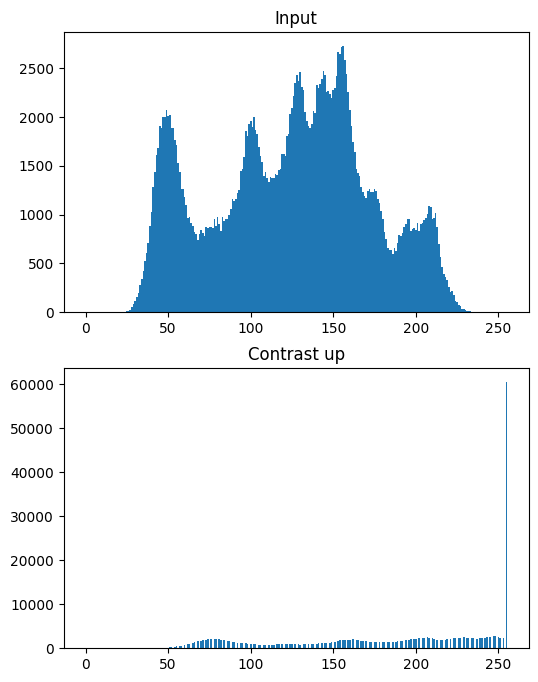

In [17]:
# 콘트라스트 전후 히스토그램 비교
import matplotlib.pyplot as plt
import cv2

def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

img = cv2.imread("./data/lena.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")
plt.subplot(212)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Contrast up")
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("./data/lena.jpg", cv2.IMREAD_GRAYSCALE)
height, width = img.shape
for y in range(height):
    for x in range(width):
        if img[y,x]>160:
            img[y,x]=160
            
img2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램 평탄화

이미지의 히스토그램이 특정 영역에 너무 집중되어 있으면 콘스라스트가 낮아 좋은 이미지라고 할 수 없습니다. 화소의 값들이 히스토그램 전체 영역에 골고루 분포되어 있을 때 좋은 이미지라고 할 수 있습니다. 

히스토그램 평탄화의 이론적인 방법은 이미지의 각 픽셀의 누적분포함수(CDF) 값을 구하고 히스토그램 균일화 공식에 대입하여 0-255 사이의 값으로 변환하는 것입니다. 이렇게 새롭게 구해진 값으로 이미지를 표현하면 균일화된 이미지를 얻을 수 있습니다. 이는 콘스라스트 강조보다 개선된 방식입니다. 

히스토그램 평탄화는 히스토그램 균등화, 평활화, 이퀄라이제이션 등으로 다양하게 불립니다(편한대로 부르세요). 

OpenCV의 cv2.equalizeHist() 함수는 히스토그램 평탄화를 구현한 함수입니다. 

In [21]:
# 배열의 히스토그램 평탄화
import cv2
import numpy as np

src = np.array([[2, 2, 4, 4],
                [2, 2, 4, 4],
                [4, 4, 4, 4],
                [4, 4, 4, 4]
              ], dtype=np.uint8)
#1
dst = cv2.equalizeHist(src)
print('dst =', dst)

#2
'''
ref: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
'''
##hist = cv2.calcHist(images = [src], channels = [0], mask = None,
##                    histSize = [256], ranges = [0, 256])
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0) # cdf에서 0을 True 마스킹  
T = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
T = np.ma.filled(T, 0).astype('uint8') # 마스킹을 0으로 채우기 
dst2 = T[src] # dst2 == dst
#print('dst2 =', dst2)

dst = [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]


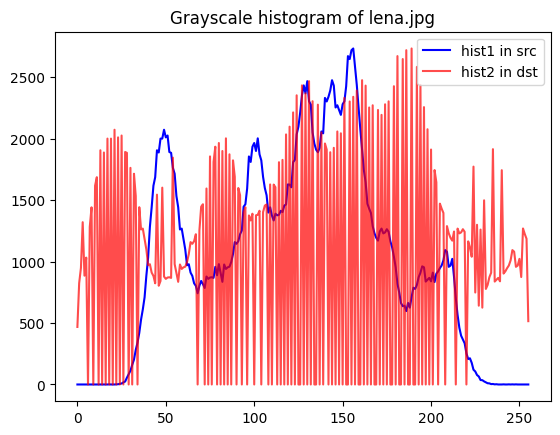

In [26]:
# 그레이스케일 영상 히스토그램 평탄화
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('src',  src)
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

plt.title('Grayscale histogram of lena.jpg')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()

In [27]:
# 컬러 영상 히스토그램 평탄화
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg')
cv2.imshow('src',  src)

#1
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h, s, v2])
dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst',  dst)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y)
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()

## CLAHE

앞에서의 히스토그램 평탄화는 이미지의 전체적인 부분에 대한 적용이었습니다. 기존의 방법은 밝은 부분과 어두운 부분이 섞여 있는 이미지에 적용하기에 적합하지 않습니다. 

CLAHE(Contrast Limited Adaptive Histogram Equalization)라고 하는 적응형 히스토그램 평탄화는 콘트라스트를 제한하여 잡음이 증폭되는 것을 방지하는 방법입니다. 

CLAHE에서 주어진 화소 값 근처의 대비 증폭은 변환 함수의 기울기에 의해 제공됩니다. 이는 인접 누적 분포 함수의 기울기에 비례하므로 해당 화소 값에서 히스토그램값에 비례합니다. CLAHE는 누적 분포 함수를 계산하기 전에 미리 정의된 값에서 히스토그램을 클리핑하여 증폭을 제한합니다. 이것은 누적 분포 함수의 기울기에 따라서 변환 함수의 기울기를 제한합니다. 히스토그램이 클리핑되는 값인 클립 제한은 히스토그램의 정규화와 이에 따른 인접 영역의 크기에 따라 달라집니다.

### cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))

- clipLimit : 대비 제한을 위한 임계값입니다. 일반적으로 3-4 값을 많이 사용합니다. 
- tileGridSize : 히스토그램 이퀄라이제이션을 위한 그리드 크기입니다. 입력 이미지는 동일한 크기의 직사각형 타일로 분할됩니다. 

In [28]:
# 클레히 히스토그램 평탄화
import cv2
import numpy as np

src = np.array([[2, 2, 2, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 2, 2, 2, 0,   0,   0,   0],
                [0, 0, 0, 0, 255, 255, 255, 255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 255, 255, 255]], dtype=np.uint8)

#1
clahe = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))
dst = clahe.apply(src)
print("dst=\n", dst)

#2
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(2,2))
dst2 = clahe2.apply(src)
print("dst2=\n", dst2)

dst=
 [[116 116 116 116  44  44  44  44]
 [116  76  76 116  44  44  44  44]
 [116  76  76 116  44  44  44  44]
 [116 116 116 116  44  44  44  44]
 [ 44  44  44  44 255 255 255 255]
 [ 44  44  44  44 255  76  76 255]
 [ 44  44  44  44 255  76  76 255]
 [ 44  44  44  44 255 255 255 255]]
dst2=
 [[ 80  80  80  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 72  72  72  66  32  36  40  40]
 [ 32  32  32  32 255 255 255 255]
 [ 40  40  40  36 255  48  48 255]
 [ 48  48  48  40 255  48  48 255]
 [ 48  48  48  40 255 255 255 255]]


In [29]:
# 클레히 구현
'''
ref1: https://github.com/opencv/opencv/blob/master/modules/imgproc/src/clahe.cpp#L157
ref2:http://www.realtimerendering.com/resources/GraphicsGems/gemsiv/clahe.c
ref3:https://gist.github.com/sadimanna/52c320ce5c49e200ce398f800d39a2c1#file-clahe-py

'''
import cv2
import numpy as np

#1
src = np.array([[2, 2, 2, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 2, 2, 2, 0,   0,   0,   0],
                [0, 0, 0, 0, 255, 255, 255, 255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 255, 255, 255]], dtype=np.uint8)

#2
def interpolate(sub_image, UL,UR,BL,BR):
    dst = np.zeros(sub_image.shape)
    sY, sX = sub_image.shape
    area = sX*sY
    #print("sX={}, sY={}".format(sX, sY))

    for y in range(sY):
        invY = sY-y
        for x in range(sX):
            invX = sX-x
            val = sub_image[y, x].astype(int)
            dst[y,x] = np.floor((invY*(invX*UL[val] + x*UR[val])+\
                                    y*(invX*BL[val] + x*BR[val]) )/area)          
    return dst

#3
def CLAHE(src, clipLimit = 40.0, tileX = 8, tileY = 8):

#3-1
    histSize = 256    
    tileSizeX = src.shape[1]//tileX
    tileSizeY = src.shape[0]//tileY
    tileArea  = tileSizeX*tileSizeY
    clipLimit = max(clipLimit*tileArea/histSize, 1)
    lutScale = (histSize - 1) / tileArea
    print("clipLimit=", clipLimit)

    LUT = np.zeros((tileY, tileX, histSize))
    dst = np.zeros_like(src)
    #print("tileX={}, tileY={}".format(tileX, tileY))

#3-2: sublocks, tiles
    for iy in range(tileY):
        for ix in range(tileX):
#3-2-1
            y = iy*tileSizeY
            x = ix*tileSizeX
            roi = src[y:y+tileSizeY, x:x+tileSizeX] # tile
            
            tileHist, bins = np.histogram(roi, histSize,[0,256])
            #tileHist=cv2.calcHist([roi],[0],None,[histSize],[0,256]).astype(np.int)
            #tileHist = tileHist.flatten()                                           
            #print("tileHist[{},{}]=\n{}".format(iy, ix, tileHist))

#3-2-2                  
            if clipLimit > 0: # clip histogram
                clipped = 0
                for i in range(histSize):
                    if tileHist[i]>clipLimit:
                        clipped += tileHist[i] - clipLimit
                        tileHist[i] = clipLimit
        
                # redistribute clipped pixels    
                redistBatch = int(clipped/ histSize)
                residual = clipped - redistBatch * histSize
                
                for i in range(histSize):
                    tileHist[i] += redistBatch
                if residual != 0:
                    residualStep = max(int(histSize/residual), 1)
                    for i in range(0, histSize, residualStep):
                        if residual> 0:
                            tileHist[i] += 1
                            residual -= 1                            
            #print("redistributed[{},{}]=\n{}".format(iy, ix, tileHist))
            
#3-2-3:     calculate Lookup table for equalizing
            cdf = tileHist.cumsum()            
            tileLut = np.round(cdf*lutScale)
            LUT[iy, ix] = tileLut          
#3-3            
    # bilinear interpolation 
    y = 0
    for i in range(tileY+1):
        if i==0:  # top row
            subY = int(tileSizeY/2)
            yU = yB = 0
        elif i==tileY: # bottom row 
            subY = int(tileSizeY/2)
            yU= yB = tileY-1
        else:
            subY = tileSizeY
            yU = i-1
            yB = i
        #print("i={}, yU={}, yB={}, subY={}".format(i, yU, yB, subY))
        
        x = 0
        for j in range(tileX+1):
            if j==0: # left column
                subX = tileSizeX//2
                xL = xR = 0
            elif j==tileX: # right column
                subX = tileSizeX//2
                xL = xR = tileX-1
            else:
                subX = tileSizeX
                xL = j-1
                xR = j
            #print(" j={}, xL={}, xR={}, subX={}".format(j, xL, xR, subX))
            
            UL = LUT[yU,xL]
            UR = LUT[yU,xR]
            BL = LUT[yB,xL]
            BR = LUT[yB,xR]
            
            roi = src[y:y+subY, x:x+subX] 
            dst[y:y+subY, x:x+subX] = interpolate(roi,UL,UR,BL,BR)
            x += subX
        y += subY        
    return  dst

#4 
##dst = CLAHE(src, clipLimit= 40.0, tileX= 1, tileY= 1)
##print("dst=", dst)
dst2 = CLAHE(src, clipLimit= 40.0, tileX= 2, tileY= 2)
print("dst=\n", dst2)

clipLimit= 2.5
dst=
 [[ 80  80  80  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 72  72  72  66  32  36  40  40]
 [ 32  32  32  32 247 247 247 247]
 [ 40  40  40  36 247  48  48 243]
 [ 48  48  48  40 247  48  48 239]
 [ 48  48  48  40 247 243 239 239]]


In [30]:
# 히스토그램 평탄화 비교
import cv2
import numpy as np 
#1
src = cv2.imread('./data/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

#2
dst = cv2.equalizeHist(src)
cv2.imshow('dst', dst)

#3
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))
dst2 = clahe2.apply(src)
cv2.imshow('dst2', dst2)

#4
clahe3 = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))
dst3 = clahe3.apply(src)
cv2.imshow('dst3', dst3)

cv2.waitKey()    
cv2.destroyAllWindows()